In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


In [2]:
df1 = pd.read_csv("/content/drive/MyDrive/Feynn Labs intership/Indian automoble buying behavour study 1.0 step1.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Feynn Labs intership/CAR DETAILS FROM CAR DEKHO.csv")
df1.head(25)

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000
5,28,Salaried,Married,Graduate,3,Yes,Yes,No,900000,0,900000,Baleno,700000
6,31,Salaried,Married,Graduate,4,No,No,Yes,1200000,600000,1800000,City,1200000
7,33,Business,Married,Post Graduate,4,No,No,No,1400000,0,1400000,Baleno,700000
8,34,Business,Married,Post Graduate,4,No,No,No,2000000,0,2000000,Verna,1100000
9,34,Salaried,Married,Graduate,3,Yes,Yes,Yes,1200000,700000,1900000,i20,800000


**Step1 Our Target segment is age group **

In [3]:
df1.shape

(99, 13)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [5]:
df1.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [6]:
Business_count = (df1["Profession"] == "Business").sum()
salaried_count = (df1["Profession"] == "Salaried").sum()


In [7]:
Business_count


35

In [8]:
salaried_count

64

In [9]:
df2.head(25)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [10]:
df2.shape

(4340, 8)

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [12]:
df2.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [13]:
df2.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [14]:
new_dataframe1 = df1[[ "Age",
                       "Profession",
                        "Salary",
                        "Wife Salary",
                        "Total Salary",
                        "Make",
                        "Price"            ]]
new_dataframe1.head(25)

,Age,Profession,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,800000,0,800000,i20,800000
1,35,Salaried,1400000,600000,2000000,Ciaz,1000000
2,45,Business,1800000,0,1800000,Duster,1200000
3,41,Business,1600000,600000,2200000,City,1200000
4,31,Salaried,1800000,800000,2600000,SUV,1600000
5,28,Salaried,900000,0,900000,Baleno,700000
6,31,Salaried,1200000,600000,1800000,City,1200000
7,33,Business,1400000,0,1400000,Baleno,700000
8,34,Business,2000000,0,2000000,Verna,1100000
9,34,Salaried,1200000,700000,1900000,i20,800000


In [15]:
new_dataframe2 =     df2[["name",
                          "selling_price",
                          "km_driven",
                          "fuel",
                          "seller_type",
                          "transmission",
                          "owner"]]
new_dataframe2.head(25)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,365000,78000,CNG,Individual,Manual,First Owner


In [16]:
print(new_dataframe1.columns)


Index(['Age', 'Profession', 'Salary', 'Wife Salary', 'Total Salary', 'Make',
       'Price'],
      dtype='object')


In [17]:
print(new_dataframe2.columns)

Index(['name', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')


In [18]:
print(type(new_dataframe1))


<class 'pandas.core.frame.DataFrame'>


In [19]:
print(type(new_dataframe2))

<class 'pandas.core.frame.DataFrame'>


In [20]:
target_age = new_dataframe1[new_dataframe1["Age"] >= 20]
target_age.head(20)

,Age,Profession,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,800000,0,800000,i20,800000
1,35,Salaried,1400000,600000,2000000,Ciaz,1000000
2,45,Business,1800000,0,1800000,Duster,1200000
3,41,Business,1600000,600000,2200000,City,1200000
4,31,Salaried,1800000,800000,2600000,SUV,1600000
5,28,Salaried,900000,0,900000,Baleno,700000
6,31,Salaried,1200000,600000,1800000,City,1200000
7,33,Business,1400000,0,1400000,Baleno,700000
8,34,Business,2000000,0,2000000,Verna,1100000
9,34,Salaried,1200000,700000,1900000,i20,800000


In [21]:
target_age.corr()

,Age,Salary,Wife Salary,Total Salary,Price
Age,1.000000,0.656442,0.288546,0.587082,0.376661
Salary,0.656442,1.000000,0.347934,0.841545,0.547630
Wife Salary,0.288546,0.347934,1.000000,0.799238,0.635858
Total Salary,0.587082,0.841545,0.799238,1.000000,0.717442
Price,0.376661,0.547630,0.635858,0.717442,1.000000


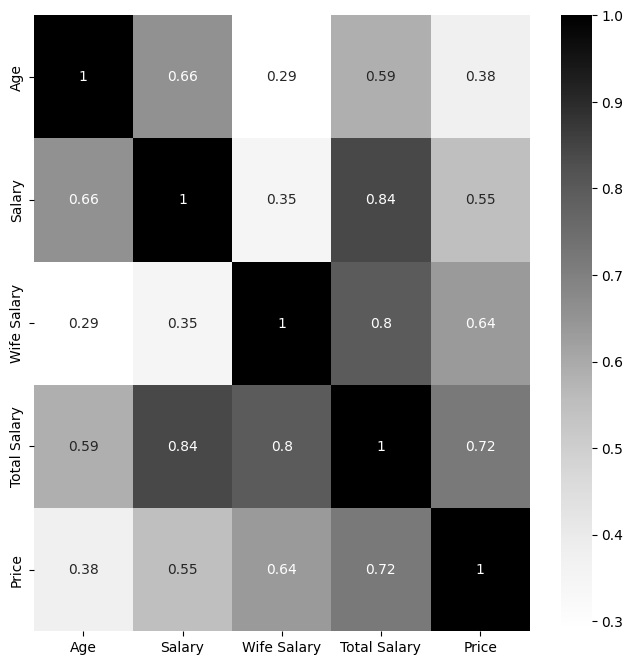

In [22]:

plt.figure(figsize=(8,8))
sns.heatmap(target_age.corr(), annot=True,cmap= "Greys")
plt.show()

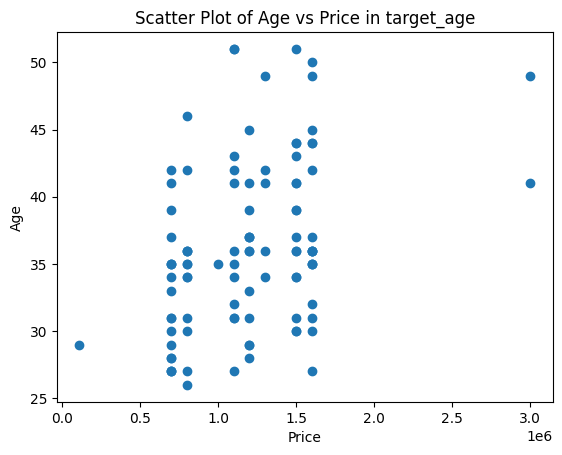

In [23]:

# Assuming your dataset is named target_age
plt.scatter(target_age['Price'], target_age['Age'])
plt.title('Scatter Plot of Age vs Price in target_age')
plt.xlabel('Price')
plt.ylabel('Age')
plt.show()


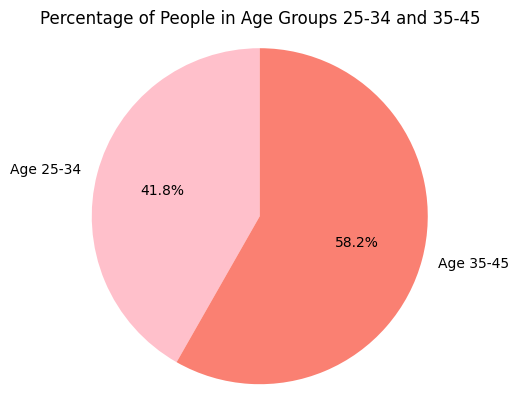

In [31]:
# Assuming you have already defined data_25_to_34 and data_35_to_45

labels = ['Age 25-34', 'Age 35-45']
sizes = [len(data_25_to_34), len(data_35_to_45)]
colors = ['pink', 'salmon']

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Percentage of People in Age Groups 25-34 and 35-45")

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()


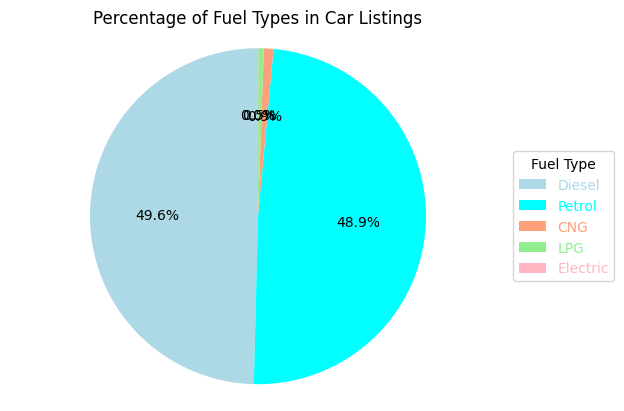

In [38]:
import matplotlib.pyplot as plt

# Assuming you have already calculated fuel_percentage

# Light colors for visualization
colors = {
    'Petrol': 'cyan',
    'Diesel': 'lightblue',
    'CNG': 'lightsalmon',
    'LPG': 'lightgreen',
    'Electric': 'lightpink'
}

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(fuel_percentage, labels=None, autopct='%1.1f%%', colors=[colors.get(fuel, 'gray') for fuel in fuel_percentage.index], startangle=90)

# Add legend with names and colors
ax.legend(fuel_percentage.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), title="Fuel Type", labelcolor=[colors.get(fuel, 'gray') for fuel in fuel_percentage.index])

plt.title('Percentage of Fuel Types in Car Listings')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()


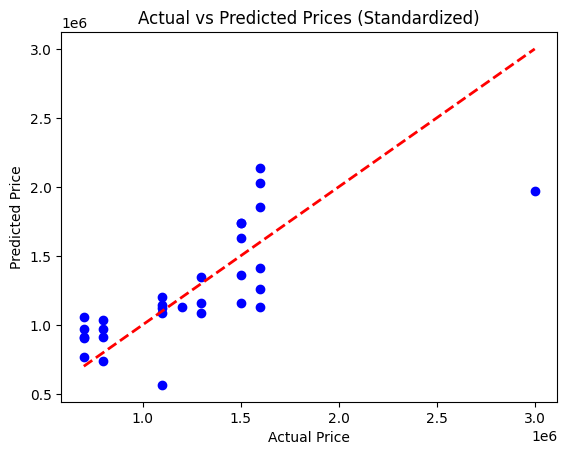

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have already defined X, y, and standardized the features

# Split the standardized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.3, random_state=35)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the standardized test set
y_pred = model.predict(X_test)

# Create a scatter plot
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs Predicted Prices (Standardized)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Add a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

# Show the plot
plt.show()
